In [1]:
from mxnet import nd
from mxnet.gluon.model_zoo import vision
import pandas as pd
import mxnet as mx

C:\Users\v-dinliu\AppData\Local\Continuum\anaconda3\envs\mxnet\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [26]:
resnet50 = vision.resnet50_v1()

In [27]:
list(enumerate(resnet50.features))

[(0,
  Conv2D(None -> 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)),
 (1,
  BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, in_channels=None)),
 (2, Activation(relu)),
 (3, MaxPool2D(size=(3, 3), stride=(2, 2), padding=(1, 1), ceil_mode=False)),
 (4, HybridSequential(
    (0): BottleneckV1(
      (body): HybridSequential(
        (0): Conv2D(None -> 64, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, in_channels=None)
        (2): Activation(relu)
        (3): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, in_channels=None)
        (5): Activation(relu)
        (6): Conv2D(None -> 256, kernel_size=(1, 1), stride=(1, 1))
        (7): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, in_channels=None)
      )
      (downsample): HybridSequential(
        (0): Conv2D(64 -> 256, kern

In [11]:
vgg16.collect_params().initialize()

In [17]:
from mxnet import gluon

In [18]:
gluon.nn.Sequential?

In [16]:
vgg16.features[0:4]

[Conv2D(3 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 Activation(relu),
 Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 Activation(relu)]

In [96]:
import sys
sys.path.append('data')
import imagenet_class

In [90]:
resnet18 = vision.resnet18_v1(pretrained=True)

In [179]:
resnet50 = vision.resnet50_v1(pretrained=True)

Model file is not found. Downloading.


In [187]:
448/16

28.0

In [1]:
cd ..

Z:\v-dinliu\Flow2D


In [5]:
import network.hybridnet
import mxnet as mx
from mxnet import nd
from importlib import reload
reload(network.hybridnet)

<module 'network.hybridnet' from 'Z:\\v-dinliu\\Flow2D\\network\\hybridnet.py'>

In [6]:
pipeline = network.hybridnet.Pipeline(ctx=[mx.cpu()])

In [8]:
pipeline.validate_batch(nd.zeros([4, 3, 320, 320]), nd.zeros([4, 3, 320, 320]),  nd.zeros([4, 2, 320, 320]))

(4, 512, 10, 10)
(4, 256, 80, 80)
(4, 512, 40, 40)
(4, 1024, 20, 20)
(4, 2048, 10, 10)


array([299.5405, 299.5405, 299.5405, 299.5405], dtype=float32)

In [68]:
mx.image.color_normalize?

In [75]:
def pred_img(image):
    image = image/255
    normalized = mx.image.color_normalize(image,
                                          mean=mx.nd.array([0.485, 0.456, 0.406]).reshape((3, 1, 1)),
                                          std=mx.nd.array([0.229, 0.224, 0.225]).reshape((3, 1, 1)))
    normalized = normalized.expand_dims(axis=0)
    pred = resnet18(normalized)
    return pred

In [239]:
a = nd.array([2, 3, 3, 4, 5])

In [244]:
nd.minimum(a > 2, a < 4)


[0. 1. 1. 0. 0.]
<NDArray 5 @cpu(0)>

In [212]:
nd.arange(20).reshape([4,5])


[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19.]]
<NDArray 4x5 @cpu(0)>

In [238]:
nd.one_hot(nd.array([[2,3,3]]),depth=3)


[[[0. 0. 1.]
  [0. 0. 0.]
  [0. 0. 0.]]]
<NDArray 1x3x3 @cpu(0)>

In [217]:
nd.one_hot(nd.array([0,1,2]), depth=10)


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
<NDArray 3x10 @cpu(0)>

In [209]:
nd.cast(nd.floor(nd.array([10, 9, 8]) / 3), 'int32')


[3 3 2]
<NDArray 3 @cpu(0)>

In [189]:
resnet50

ResNetV1(
  (features): HybridSequential(
    (0): Conv2D(3 -> 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, in_channels=64)
    (2): Activation(relu)
    (3): MaxPool2D(size=(3, 3), stride=(2, 2), padding=(1, 1), ceil_mode=False)
    (4): HybridSequential(
      (0): BottleneckV1(
        (body): HybridSequential(
          (0): Conv2D(64 -> 64, kernel_size=(1, 1), stride=(1, 1))
          (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, in_channels=64)
          (2): Activation(relu)
          (3): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, in_channels=64)
          (5): Activation(relu)
          (6): Conv2D(64 -> 256, kernel_size=(1, 1), stride=(1, 1))
          (7): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, in_channels=256)
        )
        (downsa

In [34]:
df=pd.read_csv('data/train/Annotations/train.csv')
df['image_id']='data/train/'+df['image_id']

In [38]:
%matplotlib inline
import skimage.io
import matplotlib.pyplot as plt

(512, 512, 3) trousers


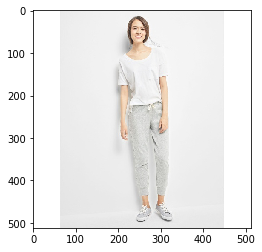

In [156]:
col = df.sample().iloc[0]
image = skimage.io.imread(col['image_id'])
plt.imshow(image)
print(image.shape, col['image_category'])

In [161]:
df.columns

Index(['image_id', 'image_category', 'neckline_left', 'neckline_right',
       'center_front', 'shoulder_left', 'shoulder_right', 'armpit_left',
       'armpit_right', 'waistline_left', 'waistline_right', 'cuff_left_in',
       'cuff_left_out', 'cuff_right_in', 'cuff_right_out', 'top_hem_left',
       'top_hem_right', 'waistband_left', 'waistband_right', 'hemline_left',
       'hemline_right', 'crotch', 'bottom_left_in', 'bottom_left_out',
       'bottom_right_in', 'bottom_right_out'],
      dtype='object')

In [157]:
pred= pred_img(nd.array(image).transpose([2, 0, 1]))
pred = -pred[0].asnumpy()
for i  in sorted(pred.argpartition(5)[:5], key=lambda x : pred[x]):
    print(imagenet_class.name[i], -pred[i])

jean, blue jean, denim 5.298012
gown 4.544918
pajama, pyjama, pj's, jammies 4.4197927
miniskirt, mini 3.8918827
jersey, T-shirt, tee shirt 3.8484972


In [173]:
from mxnet.gluon import nn

In [174]:
net=nn.HybridSequential()

In [176]:
net.add(resnet18.features[4] )

In [177]:
net.add(resnet18.features[5] )

In [178]:
net

HybridSequential(
  (0): HybridSequential(
    (0): BasicBlockV1(
      (body): HybridSequential(
        (0): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, in_channels=64)
        (2): Activation(relu)
        (3): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, in_channels=64)
      )
    )
    (1): BasicBlockV1(
      (body): HybridSequential(
        (0): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, in_channels=64)
        (2): Activation(relu)
        (3): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, in_channels=64)
      )
    )
  )
  (1): HybridSequential(
  

In [7]:
pred.shape

(1, 1000)

In [6]:
data = sym.Variable(name='data')
bottleneck = resnet18(data)

In [32]:
import mxnet as mx

In [33]:
from mxnet import nd

In [23]:
data = nd.random_uniform(shape=(300, 300, 3))

In [128]:
warp_matrix = nd.array([[[[1, 1, 1, 1],
                          [1, 1, 1, 1],
                          [1, 1, 1, 1],
                          [1, 1, 1, 1]],
                         [[0, 0, 0, 0],
                          [0, 0, 0, 0],
                          [0, 0, 0, 0],
                          [0, 0, 0, 0]]]])

In [129]:
grid=nd.GridGenerator(warp_matrix, 'warp', target_shape=(4,4))

In [138]:
grid_affine=nd.GridGenerator(nd.array([[1, 0, 0, 0, 1, 2]]), 'affine', target_shape=(4,4))

In [133]:
img=nd.array(np.arange(16).reshape(1, 1, 4, 4))

In [134]:
grid


[[[[-0.3333333   0.33333337  1.          1.6666667 ]
   [-0.3333333   0.33333337  1.          1.6666667 ]
   [-0.3333333   0.33333337  1.          1.6666667 ]
   [-0.3333333   0.33333337  1.          1.6666667 ]]

  [[-1.         -1.         -1.         -1.        ]
   [-0.3333333  -0.3333333  -0.3333333  -0.3333333 ]
   [ 0.33333337  0.33333337  0.33333337  0.33333337]
   [ 1.          1.          1.          1.        ]]]]
<NDArray 1x2x4x4 @cpu(0)>

In [135]:
img


[[[[ 0.  1.  2.  3.]
   [ 4.  5.  6.  7.]
   [ 8.  9. 10. 11.]
   [12. 13. 14. 15.]]]]
<NDArray 1x1x4x4 @cpu(0)>

In [139]:
nd.BilinearSampler(data=img, grid=grid_affine)


[[[[12. 13. 14. 15.]
   [ 0.  0.  0.  0.]
   [ 0.  0.  0.  0.]
   [ 0.  0.  0.  0.]]]]
<NDArray 1x1x4x4 @cpu(0)>

In [4]:
from mxnet.gluon import nn

In [5]:
from mxnet import nd

In [23]:
arr = nd.random_uniform(shape=(1, 20, 5, 7))

In [24]:
deconv = nn.Conv2DTranspose(2, 4, strides=2, padding=1)

In [25]:
deconv.collect_params().initialize()

In [26]:
deconv(arr).shape

(1, 2, 10, 14)

In [37]:
255/15

17.0

In [35]:
n = 31
(255//n) * n 

248

In [34]:
from mxnet.gluon import nn

In [133]:
class Downsample(nn.HybridBlock):
    def __init__(self, factor, **kwargs):
        super().__init__(**kwargs)
        self.factor = factor
    @staticmethod
    def _kernel2d(F, w):
        kernel = ((w + 1) - F.abs((w - F.arange(0, w * 2 + 1)))) / (2 * w + 1)
        kernel = F.broadcast_mul(F.expand_dims(kernel, axis=0), F.expand_dims(kernel, axis=1))
        return F.reshape(kernel, (1, 1, w * 2 + 1, w * 2 + 1))
    def hybrid_forward(self, F, img):
        batch_img = F.expand_dims(F.reshape(img, [-3, -2]), axis=1)
        factor=self.factor
        kernel = self._kernel2d(F, factor-1)
        nom = F.Convolution(data=F.ones_like(batch_img), 
                            weight=kernel, 
                            no_bias=True, 
                            kernel=(factor*2-1, factor*2-1),
                            stride=(factor, factor),
                            pad=(factor-1, factor-1), 
                            num_filter=1)
        img = F.Convolution(data=batch_img, 
                            weight=kernel, 
                            no_bias=True, 
                            kernel=(factor*2-1, factor*2-1),
                            stride=(factor, factor),
                            pad=(factor-1, factor-1), 
                            num_filter=1)
        return F.broadcast_div(F.reshape(img, [-4, -1, 2, -3, -2]), F.reshape(nom, [-4, -1, 2, -3, -2]))

In [36]:
%%time
import sys
sys.path.append('//msralab/projectdata/ehealth02/v-dinliu/Flow2D')
from reader.chairs import binary_reader, trainval
trainSet, validationSet = trainval.read('//msralab/ProjectData/ehealth02/v-dinliu/Flow2D/Data/FlyingChairs_release/FlyingChairs_train_val.txt')
validationSize = len(validationSet)
validationImg1, validationImg2, validationFlow = binary_reader.load(r"\\msralab\ProjectData\ScratchSSD\Users\v-dinliu\data\FlyingChairsBlock", "val")

Wall time: 17.9 s


In [37]:
img1 = nd.transpose(nd.array(validationImg1[0:8]), (0, 3, 1, 2))

In [38]:
flow = nd.transpose(nd.array(validationFlow[0:8]), (0, 3, 1, 2))

In [114]:
flow = flow[:, :, :320, :448]

In [134]:
net = Downsample(16)
net.hybridize()

In [136]:
x2 = net(flow).asnumpy()

In [151]:
from mxnet import sym

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [54]:
import skimage.color
import math

In [59]:
def flow2rgb(flow):
    mag = np.linalg.norm(flow, axis=-1)
    ang = np.arctan2(-flow[:, :, 1], -flow[:, :, 0])
    hsv = np.stack([(ang / math.pi + 1) / 2,
                     np.minimum(1, mag / 20),
                     np.ones_like(ang)], axis=2)
    return skimage.color.hsv2rgb(hsv)

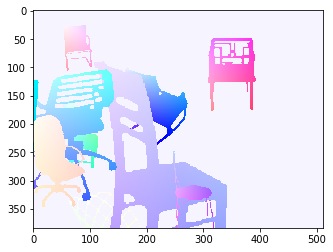

In [137]:
plt.imshow(flow2rgb(validationFlow[5]))

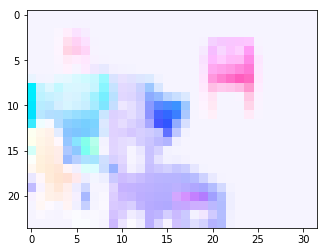

In [138]:
x2_p = np.transpose(np.squeeze(x2)[5], (1, 2, 0))
plt.imshow(flow2rgb(x2_p))

In [142]:
import numpy as np

In [148]:
np.random.uniform(*(-0.1, 0.1), size=(10, ))

array([-0.01962574,  0.02327842, -0.07109006,  0.01957276,  0.07954885,
       -0.00191852,  0.00179833, -0.08246318,  0.02846343, -0.00021504])

In [145]:
nd.mean?

Signature: nd.mean(data=None, axis=_Null, keepdims=_Null, exclude=_Null, out=None, name=None, **kwargs)
Docstring:
Computes the mean of array elements over given axes.

Defined in C:\projects\mxnet-distro-win\mxnet-build\src\operator\tensor\broadcast_reduce_op_value.cc:L101

Parameters
----------
data : NDArray
    The input
axis : Shape(tuple), optional, default=[]
    The axis or axes along which to perform the reduction.

      The default, `axis=()`, will compute over all elements into a
      scalar array with shape `(1,)`.

      If `axis` is int, a reduction is performed on a particular axis.

      If `axis` is a tuple of ints, a reduction is performed on all the axes
      specified in the tuple.

      If `exclude` is true, reduction will be performed on the axes that are
      NOT in axis instead.

      Negative values means indexing from right to left.
keepdims : boolean, optional, default=0
    If this is set to `True`, the reduced axes are left in the result as dimension